In [1]:
# -*- coding: utf-8 -*-


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import misc
from datetime import datetime
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.io import loadmat
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import copy
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import scipy.optimize
import networkx as nx
import os
from sklearn import svm
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy import stats
import math

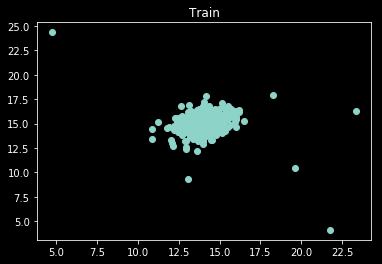

In [2]:
# task 1
# Загрузите данные ex8data1.mat из файла.
plt.style.use('dark_background')
data = loadmat("G:/Labs/bsuir-labs/11cem/ml/lab08/data/ex8data1.mat")

X = data["X"]
Xval = data["Xval"]
yval = data["yval"]

_, ax = plt.subplots()

ax.scatter(X[:,0],X[:,1])
ax.set_title("Train")
plt.show()

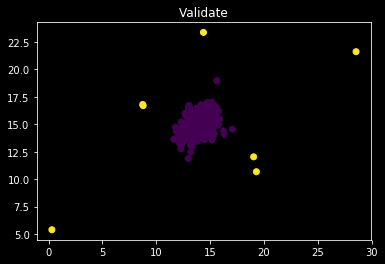

In [3]:
# task 2
# Постройте график загруженных данных в виде диаграммы рассеяния.

_, ax = plt.subplots()

ax.scatter(Xval[:,0],Xval[:,1],c=yval.squeeze())
ax.set_title("Validate")

plt.show()

[[0.10414983 0.28840769]
 [0.18720033 0.08292625]
 [0.2928096  0.16320761]
 [0.16334492 0.0934355 ]
 [0.22659215 0.13993893]
 [0.28512361 0.03502508]
 [0.06412772 0.18269515]
 [0.0313164  0.15407335]
 [0.00625063 0.08812493]
 [0.043406   0.30257494]]


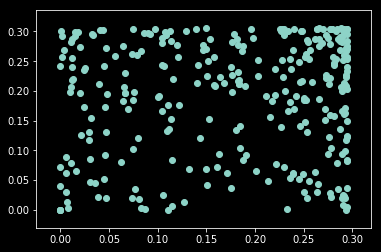

[[0.00484867 0.30941194]
 [0.20968929 0.29187653]
 [0.10198117 0.05849685]
 [0.19820508 0.12800487]
 [0.17053979 0.2340232 ]
 [0.05942127 0.11649562]
 [0.0307872  0.30811671]
 [0.24679861 0.27577228]
 [0.00098415 0.20238727]
 [0.10341125 0.30811479]]


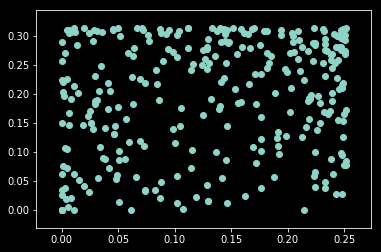

In [7]:
plt.style.use('dark_background')
data = loadmat("G:/Labs/bsuir-labs/11cem/ml/lab08/data/ex8data1.mat")

X = data["X"]
Xval = data["Xval"]
yval = data["yval"].squeeze()



# task 3
# Представьте данные в виде двух независимых нормально распределенных случайных величин.

def independent_transform(x):
    normal = []
    for i in range(x.shape[1]):
        mu, sigma = stats.norm.fit(x[:, i])
        value = 1 / math.sqrt(2*math.pi*sigma**2)*math.e**(-((x[:,i]-mu)**2/2*sigma**2))
        normal.append(value)
    return np.array(normal).T

x_n = independent_transform(X)
xval_n = independent_transform(Xval)

def show_data(x_n):
    print(x_n[:10])
    _, ax = plt.subplots()
    ax.scatter(x_n[:,0],x_n[:,1])
    plt.show()

show_data(x_n) #todo uncomment
show_data(xval_n) #todo uncomment

In [9]:
def get_stats(x):
    for i in range(x.shape[1]):
        math_expect = x[:, i].mean()
        standard_deviation = x[:, i].std()
        median = np.median(x[:, i])
        mode = stats.mode(x[:, i])
        dispersion = x[:, i].var()
        print()
        print("величина {}".format(i+1))
        print("Математическое ожидание: {}".format(math_expect))
        print("Дисперсия: {}".format(dispersion))
        print("Стандартное отклонение: {}".format(standard_deviation))
        print("Медиана: {}".format(median))
        print("Мода: значение {} повторяется {} раз".format(mode.mode[0],mode.count[0]))

# task 4
# Оцените параметры распределений случайных величин.
get_stats(x_n)
get_stats(xval_n)


величина 1
Математическое ожидание: 0.17845452459550712
Дисперсия: 0.010122344971530754
Стандартное отклонение: 0.1006098651799651
Медиана: 0.2010583576004757
Мода: значение 4.054529922329475e-36 повторяется 1 раз

величина 2
Математическое ожидание: 0.19125687820553922
Дисперсия: 0.009408400138811297
Стандартное отклонение: 0.0969969078827325
Медиана: 0.21358215268722472
Мода: значение 4.025458124725402e-45 повторяется 1 раз

величина 1
Математическое ожидание: 0.13278759471382762
Дисперсия: 0.007366016579015147
Стандартное отклонение: 0.08582550075015669
Медиана: 0.13988665642647638
Мода: значение 1.2293527903444618e-116 повторяется 1 раз

величина 2
Математическое ожидание: 0.1968652094328264
Дисперсия: 0.009712348777675364
Стандартное отклонение: 0.09855124949829588
Медиана: 0.21870466540205855
Мода: значение 4.366766136700845e-34 повторяется 1 раз


c:\users\harwister\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


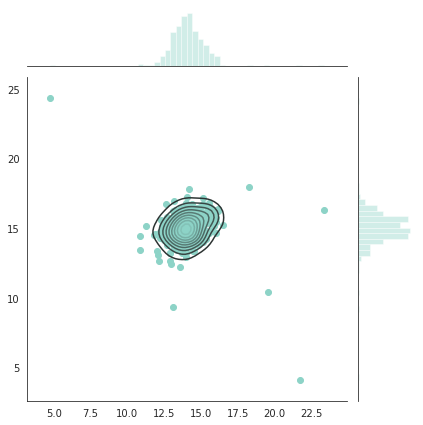

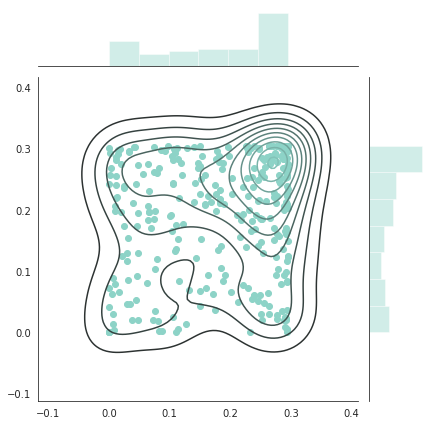

In [11]:
# task 5
# Постройте график плотности распределения получившейся случайной величины в виде изолиний, совместив его с графиком из пункта 2.

import seaborn as sns

def show_isolines(x):
    with sns.axes_style('white'):
        sns.jointplot(x[:, 0], x[:, 1]).plot_joint(sns.kdeplot)
    plt.show()

show_isolines(X)
show_isolines(x_n)

In [12]:
# task 6
# Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.

from sklearn import metrics
#F1 = 2 * (precision * recall) / (precision + recall)

def f1(ypred,yact):
    tp=0.
    tn=0.
    fp=0.
    fn=0.
    for yp,ya in zip(ypred, yact):
        if ya==1 and yp==1:
            tp+=1
        if ya==0 and yp==0:
            tn+=1
        if yp==0 and ya==1:
            fn+=1
        if yp==1 and ya==0:
            fp+=1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

# equal
print(metrics.f1_score([1,1,1], [1,0,1]))
print(f1([1,1,1], [1,0,1]))



x0_val = Xval[:,0]
x0_val_std = x0_val.std()
x0_val_mean = x0_val.mean()

x1_val = Xval[:,1]
x1_val_std = x1_val.std()
x1_val_mean = x1_val.mean()

limit = 0
f1_history = []
limit_history= []

while limit<10:
    y_pred = []
    # Z-оценка и уточненный метод Iglewicz и Hoaglin
    for x0, x1 in zip(x0_val, x1_val):
        y_pred.append(1 if abs(x0- x0_val_mean)/x0_val_std > limit or abs(x1- x1_val_mean)/x1_val_std > limit else 0)
    limit_history.append(limit)
    f1_history.append(metrics.f1_score(y_pred, yval))
    limit+=0.001


limit = limit_history[np.argmax(f1_history)]
print(limit)
print(max(f1_history))

# 3.075
# 0.8750000000000001

0.8
0.8


c:\users\harwister\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


3.0749999999997724
0.8750000000000001


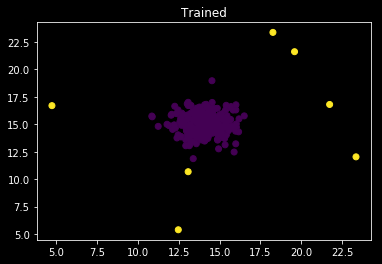

In [14]:
# task 7
# Выделите аномальные наблюдения на графике из пункта 5 с учетом выбранного порогового значения.

x0_train = X[:,0]
x0_train_std = x0_train.std()
x0_train_mean = x0_train.mean()

x1_train= Xval[:,1]
x1_train_std = x1_train.std()
x1_train_mean = x1_train.mean()


y_pred = []
# Z-оценка и уточненный метод Iglewicz и Hoaglin
for x0, x1 in zip(x0_val, x1_val):
    y_pred.append(1 if abs(x0 - x0_val_mean)/x0_val_std > limit or abs(x1- x1_val_mean)/x1_val_std > limit else 0)

_, ax = plt.subplots()

ax.scatter(x0_train,x1_train,c=y_pred)
ax.set_title("Trained")

plt.show()

In [16]:
# task 8
# Загрузите данные ex8data2.mat из файла.


data = loadmat("G:/Labs/bsuir-labs/11cem/ml/lab08//data/ex8data2.mat")

X = data["X"]
Xval = data["Xval"]
yval = data["yval"].squeeze()
print(Xval.shape)

(100, 11)


In [17]:
# task 9
# Представьте данные в виде 11-мерной нормально распределенной случайной величины.

def independent_transform(x):
    normal = []
    for i in range(x.shape[1]):
        mu, sigma = stats.norm.fit(x[:, i])
        value = 1 / math.sqrt(2*math.pi*sigma**2)*math.e**(-((x[:,i]-mu)**2/2*sigma**2))
        normal.append(value)
    return np.array(normal).T

x_n = independent_transform(X)
print(x_n)


[[6.65839709e-041 0.00000000e+000 1.44937154e-179 ... 6.36911194e-014
  1.09625884e-142 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 1.99298612e-298 ... 3.42725557e-075
  0.00000000e+000 0.00000000e+000]
 [8.21113805e-305 2.29624294e-003 3.19139365e-041 ... 2.15885720e-315
  0.00000000e+000 4.26275679e-023]
 ...
 [4.44044854e-005 8.31540998e-239 1.84958760e-035 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 6.51192674e-005 0.00000000e+000 ... 0.00000000e+000
  1.39251941e-150 8.76499496e-058]
 [2.32843808e-276 2.68570258e-119 0.00000000e+000 ... 5.33304572e-052
  0.00000000e+000 8.21214972e-247]]


In [18]:
def get_stats(x):
    for i in range(x.shape[1]):
        math_expect = x[:, i].mean()
        standard_deviation = x[:, i].std()
        median = np.median(x[:, i])
        mode = stats.mode(x[:, i])
        dispersion = x[:, i].var()
        print()
        print("величина {}".format(i))
        print("Математическое ожидание: {}".format(math_expect))
        print("Дисперсия: {}".format(dispersion))
        print("Стандартное отклонение: {}".format(standard_deviation))
        print("Медиана: {}".format(median))
        print("Мода: значение {} повторяется {} раз".format(mode.mode[0],mode.count[0]))

# task 10
# Оцените параметры распределений случайных величин.
get_stats(x_n)

stds = []
means = []
for dimension in range(Xval.shape[1]):
    stds.append(Xval[:, dimension].std())
    means.append(Xval[:, dimension].mean())
stds = np.array(stds)

means = np.array(means)


величина 0
Математическое ожидание: 0.0007774861429460399
Дисперсия: 2.9818697039347545e-05
Стандартное отклонение: 0.005460649873352763
Медиана: 0.0
Мода: значение 0.0 повторяется 512 раз

величина 1
Математическое ожидание: 0.0006446617535756798
Дисперсия: 2.3532301666311615e-05
Стандартное отклонение: 0.004851010375819827
Медиана: 1.609493930411601e-293
Мода: значение 0.0 повторяется 480 раз

величина 2
Математическое ожидание: 0.000754210810337554
Дисперсия: 2.3689501309132714e-05
Стандартное отклонение: 0.004867186179830469
Медиана: 0.0
Мода: значение 0.0 повторяется 501 раз

величина 3
Математическое ожидание: 0.0007447841346010296
Дисперсия: 2.2797443769386237e-05
Стандартное отклонение: 0.004774666875226609
Медиана: 0.0
Мода: значение 0.0 повторяется 653 раз

величина 4
Математическое ожидание: 0.0006565657585348887
Дисперсия: 1.6867802013824852e-05
Стандартное отклонение: 0.004107042976866063
Медиана: 0.0
Мода: значение 0.0 повторяется 555 раз

величина 5
Математическое ожида

In [19]:
limit = 0
f1_history = []
limit_history = []
while limit < 10:

    anomaly_detector_vector = []
    is_anomaly_vector = abs(Xval-means)/stds > limit
    for record in is_anomaly_vector:
        anomalies =0
        for dim in record:
            anomalies += 1 if dim else 0
        anomaly_detector_vector.append(anomalies)

    y_pred = []
    for i in anomaly_detector_vector:
        y_pred.append(1 if i>=1 else 0)

    # Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.
    f1_history.append(metrics.f1_score(y_pred, yval))
    limit_history.append(limit)
    limit+=0.001

# task 11
# Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.

print("best f1 found")
print(max(f1_history))
print("limit:")
print(limit_history[np.argmax(f1_history)])

anomaly_detector_vector = []
is_anomaly_vector = abs(Xval - means) / stds > limit_history[np.argmax(f1_history)]
for record in is_anomaly_vector:
    anomalies = 0
    for dim in record:
        anomalies += 1 if dim else 0
    anomaly_detector_vector.append(anomalies)

y_pred = []
for i in anomaly_detector_vector:
    y_pred.append(1 if i >= 1 else 0)

print("xval  found anomalies")
print(np.count_nonzero(y_pred))


print("xval  actual anomalies")
print(np.count_nonzero(yval))


anomaly_detector_vector = []
is_anomaly_vector = abs(X - means) / stds > limit_history[np.argmax(f1_history)]
for record in is_anomaly_vector:
    anomalies = 0
    for dim in record:
        anomalies += 1 if dim else 0
    anomaly_detector_vector.append(anomalies)

y_pred = []
for i in anomaly_detector_vector:
    y_pred.append(1 if i >= 1 else 0)

# task 11
# Выделите аномальные наблюдения в обучающей выборке. Сколько их было обнаружено? Какой был подобран порог?

print("X  found anomalies")
print(np.count_nonzero(y_pred))

c:\users\harwister\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


best f1 found
0.6666666666666666
limit:
3.0079999999997797
xval  found anomalies
5
xval  actual anomalies
10
X  found anomalies
23
